# Biodiversity in US National Parks

## Coder Girl 2021 Data Science Final Project
#### Chrissy Bellizzi and Jenny Arbuszewski

# Executive Summary

## Importing necessary libraries

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Reading in our CSV files

In [268]:
#defining a function to read our csv files and create dataframes
def read_csv(file, data_type = None):
    df_name = pd.read_csv(file, dtype = data_type)
    return df_name

species_df = read_csv('species.csv', str)
species_df.head()

#This is honestly faster to NOT use a function.

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [269]:
parks_df = read_csv('parks.csv')
parks_df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


# Preprocessing

### Renaming Columns to eliminate spaces

In [270]:

species_df.rename(columns = {'Species ID':'Species_ID'}, inplace = True)

species_df.rename(columns = {'Park Name':'Park_name'}, inplace = True)

species_df.rename(columns = {'Scientific Name':'Scientific_name'}, inplace = True)

species_df.rename(columns = {'Common Names':'Common_name'}, inplace = True)

species_df.rename(columns = {'Record Status':'Record_status'}, inplace = True)

species_df.rename(columns = {'Conservation Status':'Conservation_status'}, inplace = True)
species_df

,Species_ID,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN,NaN


In [271]:
#removing spaces for park code and park name

parks_df.rename(columns = {'Park Code':'Park_code'}, inplace = True)

parks_df.rename(columns = {'Park Name':'Park_name'}, inplace = True)

parks_df.head()

,Park_code,Park_name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


### Removing Empty column

In [272]:
species_df.head()
#Note: not sure why there is a 14th data column showing-there are only 13 columns of data-this is confirmed
#in the documentation for the dataset. Will come back and drop that.

,Species_ID,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [273]:
#drop that extra column in species_df
species_df = species_df.iloc[: , :-1]
species_df

,Species_ID,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN


### Dropping the species_id column

This column is somewhat redundant. We can essentially get the same information by combining the park name and scientific name so it will be removed from our primary dataframe.

In [274]:
species_df= species_df.drop(['Species_ID'], axis=1)

### Creating a new column for Plant/Animal Boolean

We wanted a simple way to filter by whether or not the organism in question was a plant or an animal. We recognize that fungi do not belong to either designation but for simplicity and ease of calculations, here we include all fungi in the plant category

In [275]:
plant_animal_boolean_list = []
for entry in species_df['Category']:
    if entry == 'Vascular Plant' or  entry =='Fungi' or entry =='Nonvascular Plant' or entry =='Algae':
        plant_animal_boolean = 0
        plant_animal_boolean_list.append(plant_animal_boolean)
    else:
        plant_animal_boolean = 1
        plant_animal_boolean_list.append(plant_animal_boolean)

species_df['plant_animal_boolean'] = plant_animal_boolean_list

species_df.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,1
1,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,1
2,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,1
3,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,1


### Looking at the values and number of unique entries for most categories


In [276]:
def unique(dataframe, column):
    print('The unique categories and number of values for ' + column + ' are: ')
    print(dataframe[str(column)].unique())
    print(dataframe[str(column)].nunique())

unique(species_df, 'Category')

The unique categories and number of values for Category are: 
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Spider/Scorpion' 'Insect' 'Invertebrate' 'Fungi' 'Nonvascular Plant'
 'Crab/Lobster/Shrimp' 'Slug/Snail' 'Algae']
14


In [277]:
unique(species_df, 'Park_name')


The unique categories and number of values for Park_name are: 
['Acadia National Park' 'Arches National Park' 'Badlands National Park'
 'Big Bend National Park' 'Biscayne National Park'
 'Black Canyon of the Gunnison National Park' 'Bryce Canyon National Park'
 'Canyonlands National Park' 'Capitol Reef National Park'
 'Carlsbad Caverns National Park' 'Channel Islands National Park'
 'Congaree National Park' 'Crater Lake National Park'
 'Cuyahoga Valley National Park' 'Denali National Park and Preserve'
 'Death Valley National Park' 'Dry Tortugas National Park'
 'Everglades National Park'
 'Gates Of The Arctic National Park and Preserve' 'Glacier National Park'
 'Glacier Bay National Park and Preserve' 'Great Basin National Park'
 'Grand Canyon National Park'
 'Great Sand Dunes National Park and Preserve'
 'Great Smoky Mountains National Park' 'Grand Teton National Park'
 'Guadalupe Mountains National Park' 'Haleakala National Park'
 'Hawaii Volcanoes National Park' 'Hot Springs Nationa

In [278]:
unique(species_df, 'Order')

The unique categories and number of values for Order are: 
['Artiodactyla' 'Carnivora' 'Chiroptera' 'Lagomorpha' 'Rodentia'
 'Soricomorpha' 'Accipitriformes' 'Anseriformes' 'Apodiformes'
 'Caprimulgiformes' 'Charadriiformes' 'Columbiformes' 'Coraciiformes'
 'Cuculiformes' 'Falconiformes' 'Galliformes' 'Gaviiformes' 'Gruiformes'
 'Passeriformes' 'Pelecaniformes' 'Piciformes' 'Podicipediformes'
 'Procellariiformes' 'Strigiformes' 'Suliformes' 'Squamata' 'Testudines'
 'Anura' 'Caudata' 'Anguilliformes' 'Atheriniformes' 'Clupeiformes'
 'Cypriniformes' 'Cyprinodontiformes' 'Esociformes' 'Gadiformes'
 'Gasterosteiformes' 'Osmeriformes' 'Perciformes' 'Pleuronectiformes'
 'Salmoniformes' 'Siluriformes' nan 'Acorales' 'Alismatales' 'Apiales'
 'Aquifoliales' 'Asparagales' 'Asterales' 'Boraginales' 'Brassicales'
 'Caryophyllales' 'Celastrales' 'Ceratophyllales' 'Commelinales'
 'Cornales' 'Cucurbitales' 'Dipsacales' 'Equisetales' 'Ericales' 'Fabales'
 'Fagales' 'Gentianales' 'Geraniales' 'Isoetale

In [279]:
unique(species_df, 'Family')

The unique categories and number of values for Family are: 
['Cervidae' 'Canidae' 'Felidae' ... 'Pseudeurotiaceae'
 'Cunninghamellaceae' 'Saccharomycetaceae']
2332


In [280]:
unique(species_df, 'Scientific_name')

The unique categories and number of values for Scientific_name are: 
['Alces alces' 'Odocoileus virginianus' 'Canis latrans' ...
 'Selaginella utahensis' 'Calystegia longipes'
 'Physalis hederifolia var. palmeri']
46022


In [281]:
unique(species_df, 'Category')

The unique categories and number of values for Category are: 
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Spider/Scorpion' 'Insect' 'Invertebrate' 'Fungi' 'Nonvascular Plant'
 'Crab/Lobster/Shrimp' 'Slug/Snail' 'Algae']
14


In [282]:
unique_states = parks_df['State'].unique()
print(unique_states)

num_unique_states = parks_df['State'].nunique()
print(num_unique_states)

['ME' 'UT' 'SD' 'TX' 'FL' 'CO' 'NM' 'CA' 'SC' 'OR' 'OH' 'AK' 'CA, NV' 'MT'
 'NV' 'AZ' 'TN, NC' 'WY' 'HI' 'AR' 'MI' 'KY' 'WA' 'VA' 'ND' 'MN'
 'WY, MT, ID']
27


### Considering basic information about size of parks

In [283]:
parks_df['Acres'].describe()

count    5.600000e+01
mean     9.279291e+05
std      1.709258e+06
min      5.550000e+03
25%      6.901050e+04
50%      2.387645e+05
75%      8.173602e+05
max      8.323148e+06
Name: Acres, dtype: float64

## First Pass -- missing data, data types, etc

### Seasonality

In [284]:
#what are the possible labels for the "Seasonality" column?
species_df["Seasonality"].value_counts()

Breeder                                 12214
Resident                                 3215
Migratory                                2825
Vagrant                                  1660
Breeder, Winter                            64
Rare                                       35
Summer                                     26
Migratory, Winter                          24
Breeder, Resident                          20
Winter                                     20
Breeder, Migratory                         13
Resident, Winter                            9
Uncommon                                    5
Common                                      4
Migratory, Vagrant                          4
Unknown                                     3
Breeder, Resident, Summer                   3
Migratory, Summer                           3
Summer, Vagrant                             3
Breeder, Summer                             2
Resident, Summer                            2
Breeder, Resident, Summer, Winter 

In [285]:
#20 labels in "Seasonality"; several have only a few entries - outliers may skew data
#good amount of null values as well
#let's focus on four main "Seasonality" labels

species_df = species_df[species_df['Seasonality'].isin(["Breeder", "Resident", "Vagrant", "Migratory"])]
species_df

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,1
6,Acadia National Park,Mammal,Carnivora,Felidae,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",Approved,Not Present (Historical Report),Not Native,NaN,Vagrant,NaN,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,NaN,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,Occasional,Migratory,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117878,Zion National Park,Fish,Cypriniformes,Cyprinidae,Rhinichthys osculus,Speckled Dace,Approved,Present,Native,Common,Breeder,NaN,1
117880,Zion National Park,Fish,Salmoniformes,Salmonidae,Oncorhynchus clarkii utah,Bonneville Cutthroat Trout,Approved,Present,Not Native,Occasional,Breeder,NaN,1
117881,Zion National Park,Fish,Salmoniformes,Salmonidae,Oncorhynchus mykiss,Rainbow Trout,Approved,Present,Not Native,Unknown,Breeder,NaN,1
117882,Zion National Park,Fish,Salmoniformes,Salmonidae,Salmo trutta,Brown Trout,Approved,Present,Not Native,Uncommon,Breeder,NaN,1


### Abundance

In [286]:
#what are the possible labels for the "Abundance" column?
species_df["Abundance"].value_counts()

Unknown       5104
Common        4513
Uncommon      4139
Rare          2664
Occasional    2152
Abundant       901
Name: Abundance, dtype: int64

In [287]:
#When I use the seasonality filters above, this is no longer needed.

#Remove Native and Not Native as those are clearly typos. Replace with 'Entry_error'

#species_df.loc[(species_df.Abundance == 'Native'),'Abundance']='Entry_error'     
#species_df.loc[(species_df.Abundance == 'Not Native'),'Abundance']='Entry_error'
#species_df['Abundance'].value_counts()

### Handling NaNs

In [288]:
species_df.isnull().sum()

Park_name                   0
Category                    0
Order                      85
Family                     86
Scientific_name             0
Common_name                 0
Record_status               0
Occurrence                  0
Nativeness                137
Abundance                 441
Seasonality                 0
Conservation_status     17219
plant_animal_boolean        0
dtype: int64

In [289]:
species_df.loc[(species_df.Conservation_status.isnull()),'Conservation_status']='None_given'
species_df.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,None_given,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,None_given,1
6,Acadia National Park,Mammal,Carnivora,Felidae,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",Approved,Not Present (Historical Report),Not Native,NaN,Vagrant,None_given,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,None_given,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,Occasional,Migratory,None_given,1


In [290]:
species_df.dropna(subset = ["Abundance"], inplace=True)
species_df.dropna(subset = ["Nativeness"], inplace=True)

In [291]:
species_df.isnull().sum()

Park_name                0
Category                 0
Order                   68
Family                  67
Scientific_name          0
Common_name              0
Record_status            0
Occurrence               0
Nativeness               0
Abundance                0
Seasonality              0
Conservation_status      0
plant_animal_boolean     0
dtype: int64

In [292]:
species_df.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,None_given,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,None_given,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,None_given,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,Occasional,Migratory,None_given,1
28,Acadia National Park,Mammal,Lagomorpha,Leporidae,Lepus americanus,"Snowshoe Hare, Varying Hare",Approved,Present,Native,Common,Breeder,None_given,1


#### Not dropping NaN for Order and Family because species names are present. If we need to drop for particular models later, we will.

### Making maps of park states, locations, number of parks per state, and biodiversity measures within parks.

In [138]:
#Considering number of species in a given park

#species_df.groupby(['Park_name']).count()

species_df.groupby(['Park_name']).nunique()

,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
Park_name,,,,,,,,,,,,
Acadia National Park,6,86,231,1709,1605,3,5,4,7,4,5,2
Arches National Park,6,62,166,1048,1036,2,4,3,6,4,5,2
Badlands National Park,10,88,219,1388,1031,3,6,4,7,5,5,2
Big Bend National Park,7,90,258,2269,2144,2,3,3,6,4,5,2
Biscayne National Park,8,116,361,1725,1605,3,6,4,6,5,6,2
Black Canyon of the Gunnison National Park,6,63,169,1106,1087,1,4,3,6,4,5,2
Bryce Canyon National Park,6,59,162,1286,1272,2,4,3,6,4,4,2
Canyonlands National Park,6,71,180,1223,1207,1,4,2,6,4,4,2
Capitol Reef National Park,6,68,190,1566,1548,1,4,3,6,4,4,2


In [157]:
Acadia_df.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,1
1,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,1
2,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,1
3,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,1


In [165]:
park_name_list = species_df['Park_name'].unique()
park_name_list

Acadia_df = species_df.copy(deep=True)

# selecting rows based on condition
Acadia_df = Acadia_df.loc[Acadia_df['Park_name'] == 'Acadia National Park']
  
Acadia_df

num_species = Acadia_df['Scientific_name'].nunique()
num_species
print(num_species)

num_species_native = Acadia_df.loc[Acadia_df['Nativeness'] == 'Native', 'Scientific_name'].count()
print(num_species_native)

num_species_not_native = Acadia_df.loc[Acadia_df['Nativeness'] != 'Native', 'Scientific_name'].count()
print(num_species_not_native)

perc_native = (num_species_native/num_species)*100

print(perc_native)



1709
1189
520
69.57284961966062


### Defining % Species which are Native and adding to the Parks info

In [293]:
perc_native_dict = {'num_species':[], 'perc_native':[]}


for park in park_name_list:
    native_df = species_df.copy(deep=True)
    native_df = native_df.loc[native_df['Park_name'] == str(park)]
    num_species = native_df['Scientific_name'].nunique()
    num_species_native = native_df.loc[native_df['Nativeness'] == 'Native', 'Scientific_name'].count()
    perc_native = (num_species_native/num_species)*100
    perc_native_dict['num_species'].append(num_species)
    perc_native_dict['perc_native'].append(perc_native)
    
#print(perc_native_dict)
#print(len(perc_native_dict['num_species']))
#print(perc_native_dict['perc_native'])

In [294]:
parks_df_native = parks_df.copy(deep=True)
perc_native_df =pd.DataFrame(perc_native_dict)
perc_native_df.head()

combo_df = pd.concat([parks_df_native, perc_native_df], axis=1)
combo_df

#parks_df_copy = parks_df_copy.append(perc_native_df, ignore_index=True)
#parks_df_copy.head()

#print(perc_native_dict)

,Park_code,Park_name,State,Acres,Latitude,Longitude,num_species,perc_native
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,241,81.742739
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,230,95.217391
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,234,97.435897
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,595,96.470588
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,344,87.790698
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72,208,94.711538
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18,211,99.052133
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93,300,90.666667
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17,314,95.859873
9,CAVE,Carlsbad Caverns National Park,NM,46766,32.17,-104.44,274,96.715328


In [295]:
agg_df2 = parks_df.copy(deep = True)
agg_df2.head()

,Park_code,Park_name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [296]:
aggregate_dict = {'num_species':[], 'perc_native':[],'num_categories_present':[], 'num_orders_present':[], 
                  'num_families_present':[],'num_rare':[], 'num_uncommon':[], 'perc_uncommon_rare':[], 
                  'num_protected':[], 'perc_protected':[],'num_endangered':[], 'perc_endangered':[], 
                  'num_plants':[], 'num_animals':[], 'perc_plants':[], }


for park in park_name_list:
    agg_df = species_df.copy(deep=True)
    agg_df = agg_df.loc[agg_df['Park_name'] == str(park)]
       
    num_species = agg_df['Scientific_name'].nunique()
    num_species_native = agg_df.loc[agg_df['Nativeness'] == 'Native', 'Scientific_name'].count()
    perc_native = (num_species_native/num_species)*100
    aggregate_dict['num_species'].append(num_species)
    aggregate_dict['perc_native'].append(perc_native)
    
  
    num_categories_present = agg_df['Category'].nunique()
    num_orders_present = agg_df['Order'].nunique()
    num_families_present = agg_df['Family'].nunique()
    num_rare = agg_df.loc[agg_df['Abundance'] == 'Rare', 'Scientific_name'].count() 
    num_uncommon = agg_df.loc[agg_df['Abundance'] == 'Uncommon', 'Scientific_name'].count() 
    perc_uncommon_rare = ((num_rare + num_uncommon)/num_species)*100
    num_concern = agg_df.loc[agg_df['Conservation_status'] == 'Species of Concern', 'Scientific_name'].count() 
    num_prop_threatened = agg_df.loc[agg_df['Conservation_status'] == 'Proposed Threatened', 'Scientific_name'].count() 
    num_threatened = agg_df.loc[agg_df['Conservation_status'] == 'Threatened', 'Scientific_name'].count() 
    num_prop_endangered = agg_df.loc[agg_df['Conservation_status'] == 'Proposed Endangered', 'Scientific_name'].count()
    num_endangered = agg_df.loc[agg_df['Conservation_status'] == 'Endangered', 'Scientific_name'].count() 
    num_protected = num_prop_threatened + num_concern + num_threatened + num_prop_endangered + num_endangered
    perc_protected = (num_protected/num_species)*100
    perc_endangered = ((num_prop_endangered + num_endangered)/num_species)*100
    num_plants = agg_df.loc[agg_df['plant_animal_boolean'] == 0, 'Scientific_name'].count() 
    num_animals = num_species - num_plants
    perc_plants = (num_plants/num_species)*100

    aggregate_dict['num_categories_present'].append(num_categories_present)
    aggregate_dict['num_orders_present'].append(num_orders_present)
    aggregate_dict['num_families_present'].append(num_families_present)
    aggregate_dict['num_rare'].append(num_rare)
    aggregate_dict['num_uncommon'].append(num_categories_present)
    aggregate_dict['perc_uncommon_rare'].append(perc_uncommon_rare)

    aggregate_dict['num_protected'].append(num_protected)
    aggregate_dict['perc_protected'].append(perc_protected)
    aggregate_dict['num_endangered'].append(num_endangered)
    aggregate_dict['perc_endangered'].append(perc_endangered)
    aggregate_dict['num_plants'].append(num_plants)
    aggregate_dict['num_animals'].append(num_animals)
    aggregate_dict['perc_plants'].append(perc_plants)



In [297]:
agg_calcs_df_2 = agg_df2.copy(deep=True)
agg_calcs_df =pd.DataFrame(aggregate_dict)
agg_calcs_df.head()

biodiversity_df = pd.concat([agg_calcs_df_2, agg_calcs_df], axis=1)
biodiversity_df.columns

Index(['Park_code', 'Park_name', 'State', 'Acres', 'Latitude', 'Longitude',
       'num_species', 'perc_native', 'num_categories_present',
       'num_orders_present', 'num_families_present', 'num_rare',
       'num_uncommon', 'perc_uncommon_rare', 'num_protected', 'perc_protected',
       'num_endangered', 'perc_endangered', 'num_plants', 'num_animals',
       'perc_plants'],
      dtype='object')

### Maps

In [85]:
import cartopy
from cartopy.io import shapereader
import cartopy.crs as ccrs
import geopandas
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ModuleNotFoundError: No module named 'geopandas'

In [298]:
import plotly.express as px
import plotly.graph_objects as go

In [299]:
biodiversity_df.head()

,Park_code,Park_name,State,Acres,Latitude,Longitude,num_species,perc_native,num_categories_present,num_orders_present,...,num_rare,num_uncommon,perc_uncommon_rare,num_protected,perc_protected,num_endangered,perc_endangered,num_plants,num_animals,perc_plants
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,241,81.742739,5,37,...,24,5,23.651452,27,11.203320,1,0.414938,0,241,0.0
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,230,95.217391,5,27,...,34,5,48.260870,47,20.434783,1,0.434783,0,230,0.0
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,234,97.435897,4,25,...,17,4,58.119658,43,18.376068,1,0.427350,0,234,0.0
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,595,96.470588,5,36,...,153,5,43.025210,101,16.974790,7,1.176471,0,595,0.0
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,344,87.790698,4,36,...,65,4,46.802326,40,11.627907,0,0.000000,0,344,0.0


### Defining a function to make plotting on maps easy and replicable

In [ ]:
def mapping_function(df, desc1, desc2, col1, col2, col3, rgb_line, rgb_land, colorscale, fig_title):
    #df = dataframe, desc1 = text desired to describe info in col2, desc2 = text desired to describe info in col 3,
    #col1 = desired nominal col for labels, col2 = col correlated to size of points in scatterplot,
    #col3 = col correlated to color of points in scatterplot, rgb_line = color of lines around points in scatterplot,
    #rgb_land = color of background map land, colorscale = colorscale to be used for scatterplot points
    
    #defining text labels for scatter plot on map
    df['text'] = df[str(col1)] + '<br>' + \
        (df[str(col2)]).astype(str) + str(desc1) + '<br>' + \
        (df[str(col3)]).astype(str) + 'desc2'
    
    #setting the scale. We will keep this constant at 8000 as it seems to work well.
    scale = 8000
    
    #defining the figure as a geo-objects figure
    fig = go.Figure()
    
    #Adding the code to create a scatterplot. Here we are only interested in US map, so it's hardcoded as such.
    #This could easily be converted as a variable. Lat and Long coordinates are defined and text for markers is called.
    #Everything about markers is set.
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['text'],
        marker = dict(
            size = df[str(col2)] / scale,
            color = df[str(col3)],
            line_color = str(rgb_line),
            line_width = 0.75,
            sizemode = 'area',
            colorscale_map = str(colorscale),
            cmax = df[str(col3)].max(),
            cmin = df[str(col3)].min(),
            colorbar = {'title': str(colorbar_title)}
            )))
    
    fig.update_layout(
        title_text = str(fig_title),
        geo = dict(
            scope = 'usa',
            landcolor = str(rgb_land)', 
        )
    )

    fig.show()
    
    

In [247]:

biodiversity_df['Park_text'] = biodiversity_df['Park_name'] + '<br>' + \
    (biodiversity_df['Acres']).astype(str) + ' Park size in Acres' + '<br>' + \
    (biodiversity_df['num_species']).astype(str)+' Unique Species'

In [248]:
scale = 8000

In [257]:
#Add comments and adjust
fig = go.Figure()

#for index, row in geo_parks.iterrows():
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = biodiversity_df['Longitude'],
    lat = biodiversity_df['Latitude'],
    text = biodiversity_df['Park_text'],
    marker = dict(
        size = biodiversity_df['Acres']/scale,
        color = biodiversity_df['num_species'],
        line_color='rgb(8, 8, 8)',
        line_width=0.75,
        sizemode = 'area',
        colorscale = 'RdYlBu',
        cmax = biodiversity_df['num_species'].max(),
        cmin = biodiversity_df['num_species'].min(),
        colorbar = {'title': 'Number of Species'}
        )))


fig.update_layout(
        title_text = 'Total Biodiversity and Size (in Acres) of US National Parks',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(180, 180, 180)',
        )
    )

fig.show()

### Considering Unique Species

In [300]:
species_df.columns

Index(['Park_name', 'Category', 'Order', 'Family', 'Scientific_name',
       'Common_name', 'Record_status', 'Occurrence', 'Nativeness', 'Abundance',
       'Seasonality', 'Conservation_status', 'plant_animal_boolean'],
      dtype='object')

In [301]:
def drop_dup(df, col):
    new_df = df.copy(deep=True)
    new_df.drop_duplicates(subset=str(col))
    
unique_species = drop_dup(species_df, 'Scientific_name')
print(unique_species)

None


In [308]:
unique_species_df = species_df.copy(deep=True)
unique_species_df = unique_species_df.drop_duplicates(subset = 'Scientific_name', keep = False)
unique_species_df

print(unique_species_df.shape)

unique_species_df.groupby('Park_name').count()['Order'].sum()

(4172, 13)


4108

## Encoding 

Almost all of our data (especially for the species_df) is categorical. Therefore, we need to do some label encoding before we can appropriately create and train our models. We handle abundance and conservation status separately from the rest of the column encoding-details and motivation are shared below.

#### Abundance and Conservation_status:

These categories are ordinal, meaning that there IS a value associated with the category labels. Here, we encode those data such that: for Abundance, the most rare organisms are assigned a score of 1 and the most abundant are assigned the highest score. Organisms with no abundance data have not been included (have been removed from the dataframe). For conservation_status, if no information is given, the assigned value with be 0 and the most endangered animals will be assigned the highest values.

#### Encoding Abundance

In [64]:
species_df['Abundance'].unique()

array(['Rare', 'Common', 'Occasional', 'Abundant', 'Uncommon', 'Unknown'],
      dtype=object)

In [65]:
Abundance_dict = {'Unknown' : 0, 'Rare' : 1, 'Uncommon' : 2, 'Occasional' : 3, 'Common' : 4, 'Abundant' : 5}

species_df_encoded = species_df.copy(deep=True)


In [66]:
species_df_encoded ['Abundance'] = species_df_encoded.Abundance.map(Abundance_dict)
species_df_encoded.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,1,Resident,None_given,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,4,Breeder,None_given,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,4,Breeder,None_given,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,3,Migratory,None_given,1
28,Acadia National Park,Mammal,Lagomorpha,Leporidae,Lepus americanus,"Snowshoe Hare, Varying Hare",Approved,Present,Native,4,Breeder,None_given,1


#### Encoding Conservation_Status

In [67]:
species_df['Conservation_status'].unique()

array(['None_given', 'Species of Concern', 'In Recovery', 'Under Review',
       'Endangered', 'Threatened', 'Proposed Endangered',
       'Proposed Threatened'], dtype=object)

In [68]:
Conservation_dict = {'None_given' : 0, 'Under Review' : 1, 'In Recovery' : 2, 'Species of Concern' : 3, 'Proposed Threatened' : 4, 'Threatened' : 5, 'Proposed Endangered' : 6, 'Endangered' : 7}

species_df_encoded_cons = species_df_encoded.copy(deep=True)

In [69]:
species_df_encoded_cons ['Conservation_status'] = species_df_encoded_cons.Conservation_status.map(Conservation_dict)
species_df_encoded_cons.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,1,Resident,0,1
4,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,4,Breeder,0,1
8,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,4,Breeder,0,1
22,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus borealis,"Eastern Red Bat, New York Bat, Northern Red Ba...",Approved,Present,Native,3,Migratory,0,1
28,Acadia National Park,Mammal,Lagomorpha,Leporidae,Lepus americanus,"Snowshoe Hare, Varying Hare",Approved,Present,Native,4,Breeder,0,1


#### Encoding other data

In [70]:
#this data is primarily text
#so we will need to do some label encoding before we can create and train data models

#label encode Park Name
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

def LabelEncode (df, col_list):
    for col in df[col_list]:
        df[col] = class_labels.fit_transform(df[col].values)

In [80]:
#label encode species dataframe
col_list = ['Park_name', 'Category', 'Order', 'Family', 'Scientific_name', 'Nativeness', 'Seasonality', 'Record_status', 'Occurrence']

species_final_enc = species_df_encoded_cons.copy(deep = True)
LabelEncode(species_final_enc, col_list)
species_final_enc.head()

,Park_name,Category,Order,Family,Scientific_name,Common_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,0,6,17,150,161,Moose,0,0,0,1,2,0,1
4,0,6,31,128,5916,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",0,0,2,4,0,0,1
8,0,6,31,479,3149,"Otter, River Otter",0,0,0,4,0,0,1
22,0,6,37,789,2888,"Eastern Red Bat, New York Bat, Northern Red Ba...",0,0,0,3,1,0,1
28,0,6,86,412,2978,"Snowshoe Hare, Varying Hare",0,0,0,4,0,0,1


#### Encoding parks data (Park Name, State)

In [81]:
#label encode species dataframe
col_list = ['Park_name', 'State']

parks_final = parks_df.copy(deep = True)
LabelEncode(parks_final, col_list)
parks_final.head()

,Park_code,Park_name,State,Acres,Latitude,Longitude
0,ACAD,0,9,47390,44.35,-68.21
1,ARCH,1,22,76519,38.68,-109.57
2,BADL,2,19,242756,43.75,-102.50
3,BIBE,3,21,801163,29.25,-103.25
4,BISC,4,6,172924,25.65,-80.08


In [310]:
#label encode biodiversity_df

col_list = ['Park_code', 'Park_name', 'State']
biodiversity_encoded = biodiversity_df.copy(deep = True)
LabelEncode(biodiversity_encoded, col_list)

biodiversity_encoded.head()

,Park_code,Park_name,State,Acres,Latitude,Longitude,num_species,perc_native,num_categories_present,num_orders_present,...,num_rare,num_uncommon,perc_uncommon_rare,num_protected,perc_protected,num_endangered,perc_endangered,num_plants,num_animals,perc_plants
0,0,0,9,47390,44.35,-68.21,241,81.742739,5,37,...,24,5,23.651452,27,11.203320,1,0.414938,0,241,0.0
1,1,1,22,76519,38.68,-109.57,230,95.217391,5,27,...,34,5,48.260870,47,20.434783,1,0.434783,0,230,0.0
2,2,2,19,242756,43.75,-102.50,234,97.435897,4,25,...,17,4,58.119658,43,18.376068,1,0.427350,0,234,0.0
3,3,3,21,801163,29.25,-103.25,595,96.470588,5,36,...,153,5,43.025210,101,16.974790,7,1.176471,0,595,0.0
4,4,4,6,172924,25.65,-80.08,344,87.790698,4,36,...,65,4,46.802326,40,11.627907,0,0.000000,0,344,0.0


In [337]:
biodiversity_encoded.columns

Index(['Park_code', 'Park_name', 'State', 'Acres', 'Latitude', 'Longitude',
       'num_species', 'perc_native', 'num_categories_present',
       'num_orders_present', 'num_families_present', 'num_rare',
       'num_uncommon', 'perc_uncommon_rare', 'num_protected', 'perc_protected',
       'num_endangered', 'perc_endangered', 'num_plants', 'num_animals',
       'perc_plants'],
      dtype='object')

### Filtering the data: Removing Common Names column

Scientific names should be unique and may be useful later on. Common names on the other hand are useful for human understanding but a) there are many names for some organisms so there is a question of which is the most common common name and b) encoding the scientific names are likely more useful  for machine learning/modeling

In [83]:
species_final = species_final_enc.copy(deep=True)

species_final = species_final_enc.drop(labels = ["Common_name"], axis = 1)

species_final.head()

,Park_name,Category,Order,Family,Scientific_name,Record_status,Occurrence,Nativeness,Abundance,Seasonality,Conservation_status,plant_animal_boolean
0,0,6,17,150,161,0,0,0,1,2,0,1
4,0,6,31,128,5916,0,0,2,4,0,0,1
8,0,6,31,479,3149,0,0,0,4,0,0,1
22,0,6,37,789,2888,0,0,0,3,1,0,1
28,0,6,86,412,2978,0,0,0,4,0,0,1


In [ ]:
#check data types - see if our label encoding behaved
species_df_filtered.info()

### Considering redundancy and multicollinearity

In [317]:
corrMatrix = biodiversity_encoded.corr()

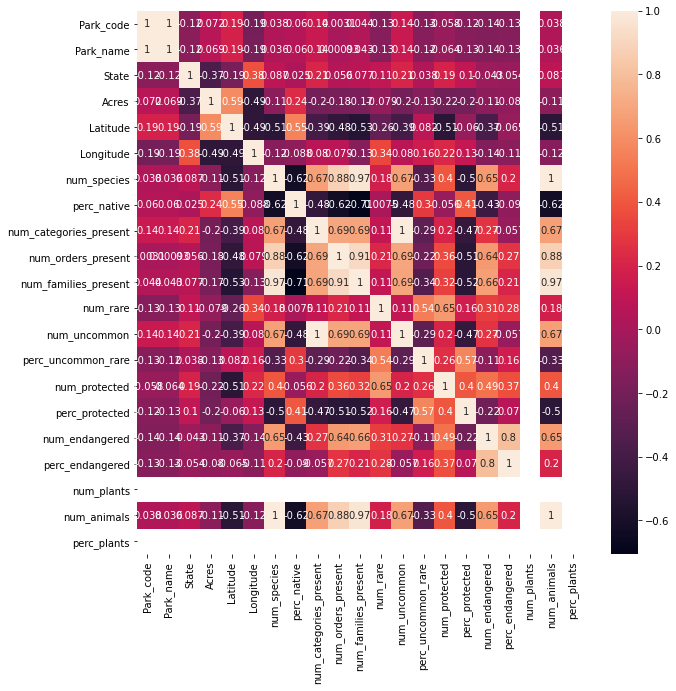

In [319]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix, annot=True)
plt.show()

## Basic Data Exploration & Visualizations

### species

#### number of species

### parks

## Preprocessing

### Removing missing data

###

### Encoding state names and park names/codes?

### Encoding species id, park name, category, order, family, scientific name--well, pretty much everything

# Modeling

## K-Means Clusters

In [338]:
# Scaling the data using StandardScaler


from sklearn.preprocessing import StandardScaler

#selecting just the columns we would like to use 
#selected_biodiversity 
biodiversity_selected = biodiversity_encoded.copy(deep=True)
biodiversity_selected = biodiversity_selected.drop(['Park_code', 'State', 'perc_uncommon_rare', 'perc_protected',
                                                   'perc_endangered', 'perc_plants'], axis=1)




#Standardize
def scale_data(df):
    sc=StandardScaler()
    scaled_df = sc.fit_transform(df)
    return scaled_df


scaled_bio = scale_data(biodiversity_selected)
scaled_bio

#reshaping the data:
#print(scaled_bio)
#biodiversity_encoded.head()

array([[-1.70139262e+00, -5.19820779e-01,  2.88231780e-01,
         2.02458616e+00, -4.25914067e-01, -1.43854314e+00,
        -1.09917593e-01,  3.89374721e-01, -2.84032172e-01,
        -6.75207850e-01, -1.09917593e-01, -9.92607283e-01,
        -2.36643191e-01,  0.00000000e+00, -4.25914067e-01],
       [-1.63952380e+00, -5.02624656e-01, -2.36234436e-01,
         1.64792363e-01, -4.70839250e-01,  1.75021351e-01,
        -1.09917593e-01, -4.09342656e-01, -4.17855022e-01,
        -3.88538861e-01, -1.09917593e-01,  1.05930421e-01,
        -2.36643191e-01,  0.00000000e+00, -4.70839250e-01],
       [-1.57765497e+00, -4.04487682e-01,  2.32732709e-01,
         4.82701989e-01, -4.54502820e-01,  4.40683316e-01,
        -6.69498065e-01, -5.69086131e-01, -4.94325222e-01,
        -8.75876142e-01, -6.69498065e-01, -1.13777119e-01,
        -2.36643191e-01,  0.00000000e+00, -4.54502820e-01],
       [-1.51578615e+00, -7.48356000e-02, -1.10849483e+00,
         4.48977488e-01,  1.01985999e+00,  3.25089342

In [339]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def k_means_cluster(df):

    inertias = []
    distortions = []
    for k in range(1,10):
        #build and fit the model
        model = KMeans(n_clusters=k, init = 'k-means++').fit(df)
    
        #average of squared distance from cluster center to the data points
        distortion = sum(np.min(cdist(df, model.cluster_centers_,
                                      'euclidean'),axis =1))/df.shape[0]
    
        distortions.append(distortion)
    
        inertia = model.inertia_
        inertias.append(inertia)
        
    # Setting up subplots and plotting elbow method with distortion and inertia
    plt.subplot(1, 2, 1)
    plt.plot(range(1,10), distortions)
    plt.title("Elbow Method with Distortion")
  
    plt.subplot(1,2,2)
    plt.plot(range(1,10), inertias)
    plt.title("Elbow Method with Inertia")
        

    
#print(scaled_bio)

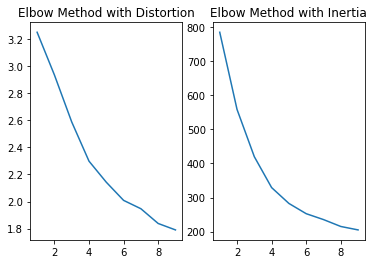

In [340]:
k_means_cluster(scaled_bio)

### Trying a hierarchical model on the same data.

Hierarchical models may often be more easily interpretable and therefore may be more immediately useful.

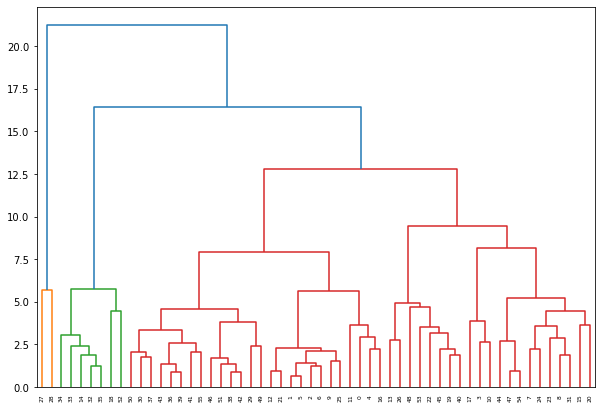

In [341]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_bio,'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked)
plt.show()

In [26]:
###Need to try this again including labels somewhere??? I think we did that in class?